In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
final_team_stats = pd.read_csv('final_team_stats.csv')
cols_to_drop = [0,1,4,5,7,8]
cols_to_drop2 = ['index','Team_H','Team_A','Location','GameIDs','Date','Season']
final_team_stats_cols_dropped = final_team_stats.drop(cols_to_drop2,axis=1)
feautres = final_team_stats_cols_dropped.drop(['home_win'],axis=1)
home_win = final_team_stats['home_win']

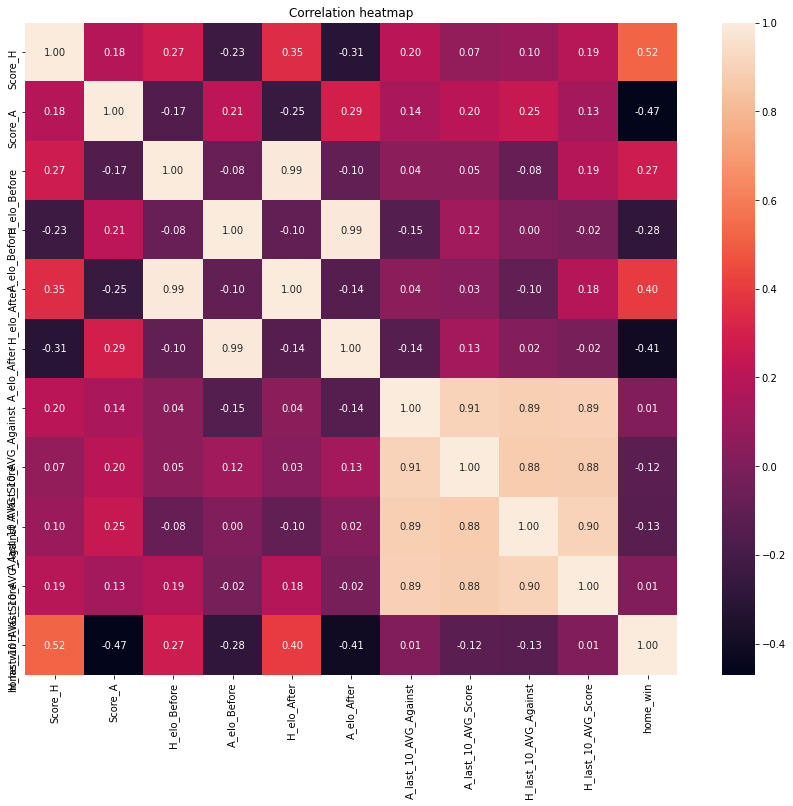

In [3]:
correlation = final_team_stats_cols_dropped.corr()
plt.figure(figsize=(16,12))
plt.title("Correlation heatmap")
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=90)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feautres, home_win,test_size=0.2)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
# print(x_train)

model = LogisticRegression(random_state=42)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)
# print(y_pred)
# print(metrics.accuracy_score(y_test,y_pred))

# print(model.get_params)

[[41  1]
 [ 0 38]]


0.9875

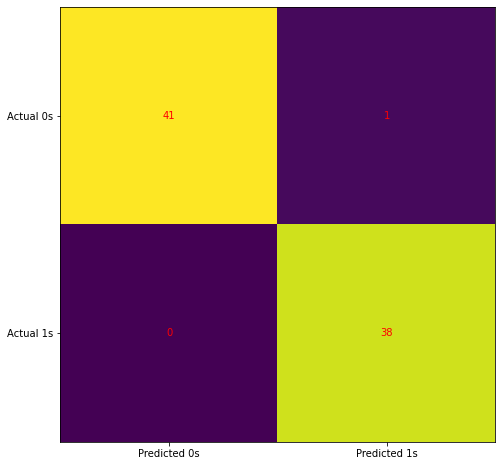

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()